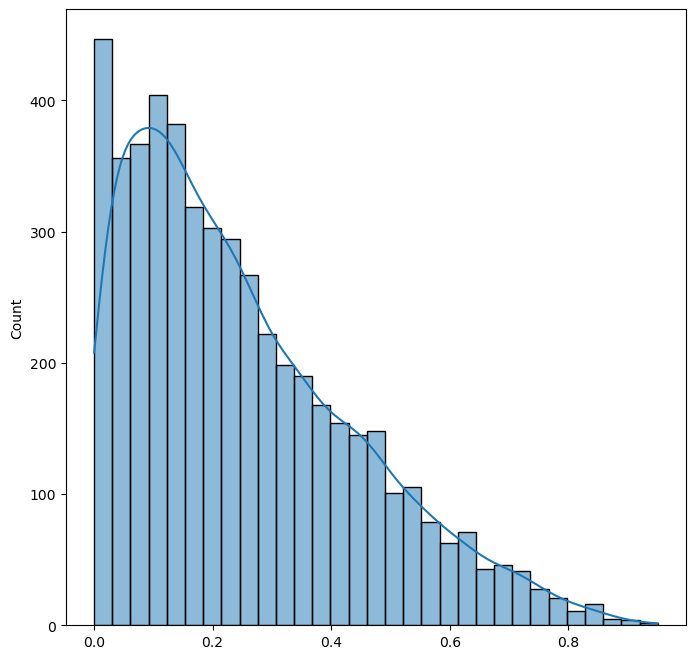

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 8))
data = np.random.beta(1, 3, 5000)
sns.histplot(data, kde=True)
plt.show()

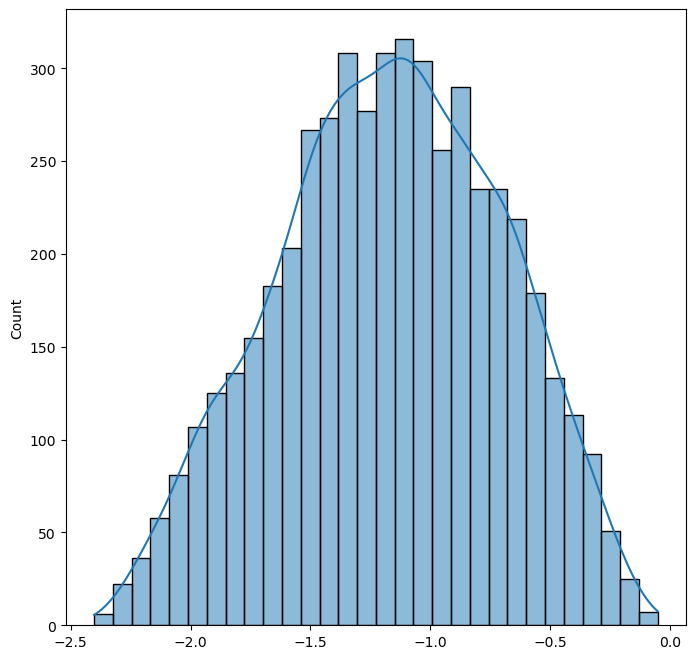

In [11]:
from scipy import stats
tdata = stats.boxcox(data)[0]
plt.figure(figsize = (8, 8))
sns.histplot(tdata, kde=True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.io import loadmat
from scipy import stats

# Source: https://github.com/Grzego/handwriting-generation/issues/16
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

def estimate_gaussian_params(X):
	mu = (np.sum(X, axis=0)) / X.shape[0] # = np.mean(X, axis=0) or X.mean(axis=0)
	sigma2 = (np.sum((X - mu)**2, axis=0)) / X.shape[0] # = np.var(X, axis=0) or X.var(axis=0)

	return (mu, sigma2)

def main():
	data = loadmat('ex8data1.mat')
	X = data['X']

	(mu, sigma2) = estimate_gaussian_params(X)
	print('mu: ' + str(mu))
	print('variance: ' + str(sigma2))

	# Plot dataset
	plt.scatter(X[:,0], X[:,1], marker='x')
	plt.axis('equal')
	plt.show()

	# Plot dataset and contour lines
	plt.scatter(X[:,0], X[:,1], marker='x')
	x = np.arange(0, 25, .025)
	y = np.arange(0, 25, .025)
	first_axis, second_axis = np.meshgrid(x, y)
	Z = bivariate_normal(first_axis, second_axis, np.sqrt(sigma2[0]), np.sqrt(sigma2[1]), mu[0], mu[1])
	plt.contour(first_axis, second_axis, Z, 10, cmap=plt.cm.jet)
	plt.axis('equal')
	plt.show()

mu: [14.11222578 14.99771051]
variance: [1.83263141 1.70974533]


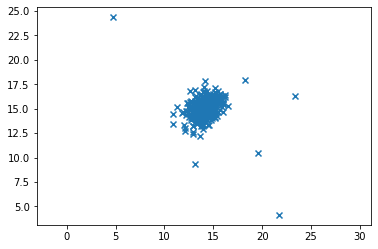

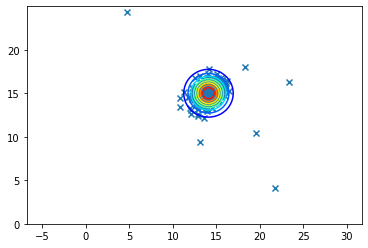

In [ ]:
main()